In [5]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

yelp = pd.read_csv('yreviews.csv', encoding='utf-8')

yelp['text length'] = yelp['text'].apply(len)

yelp_class = yelp[(yelp['opinion'] == 'negative') | (yelp['opinion'] == 'positive')]

X = yelp_class['text']
y = yelp_class['opinion']

def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

X = bow_transformer.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

preds = nb.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[ 536  406]
 [ 163 1895]]


             precision    recall  f1-score   support

   negative       0.77      0.57      0.65       942
   positive       0.82      0.92      0.87      2058

avg / total       0.81      0.81      0.80      3000



In [14]:
review = yelp_class['text'][15]
print review
positive_review_transformed = bow_transformer.transform([review])
str(nb.predict(positive_review_transformed)[0])

Was it worth the 21$ for a salad and small pizza? Absolutely not! Bad service. Maybe the guys grandma died I don't know. I want to tell you what really made me mad about the experience. We order the small pizza and salad and the guys could have cared less and took our $ and we sat down. We were looking around and hmm, there's a sign saying "x large pizza and large salad only 23$". Wow that would have been nice if the guy told us that. I left hungry, mad and unsatisfied. 

To the owner: teach your employees the value of upselling and telling the specials. Something so small can affect a customers experience negatively. 

And your salads are severely overpriced 

Won't go back unless I'm desperate.


'negative'

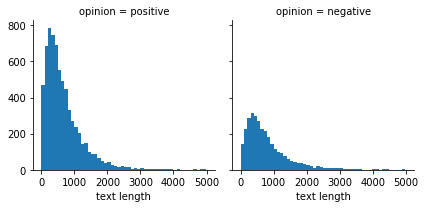

In [15]:
g = sns.FacetGrid(data=yelp, col='opinion')
g.map(plt.hist, 'text length', bins=50)